In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('car data.csv')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape 

(301, 9)

In [ ]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique()) #category

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [ ]:
df.isnull().sum() 

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.columns


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
finaldf=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']] #clean

In [ ]:
finaldf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
finaldf['Current Year']=2022

In [ ]:
finaldf['Car Year'] = finaldf['Current Year'] - finaldf['Year'] 

In [ ]:
finaldf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,Car Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [ ]:
finaldf.drop(['Year'],axis=1,inplace=True)
finaldf.drop(['Current Year'],axis=1,inplace=True)

In [ ]:
finaldf.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [ ]:
finaldf=pd.get_dummies(finaldf,drop_first=True) 

In [ ]:
finaldf.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [ ]:
finaldf.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car Year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [ ]:
import seaborn as sea

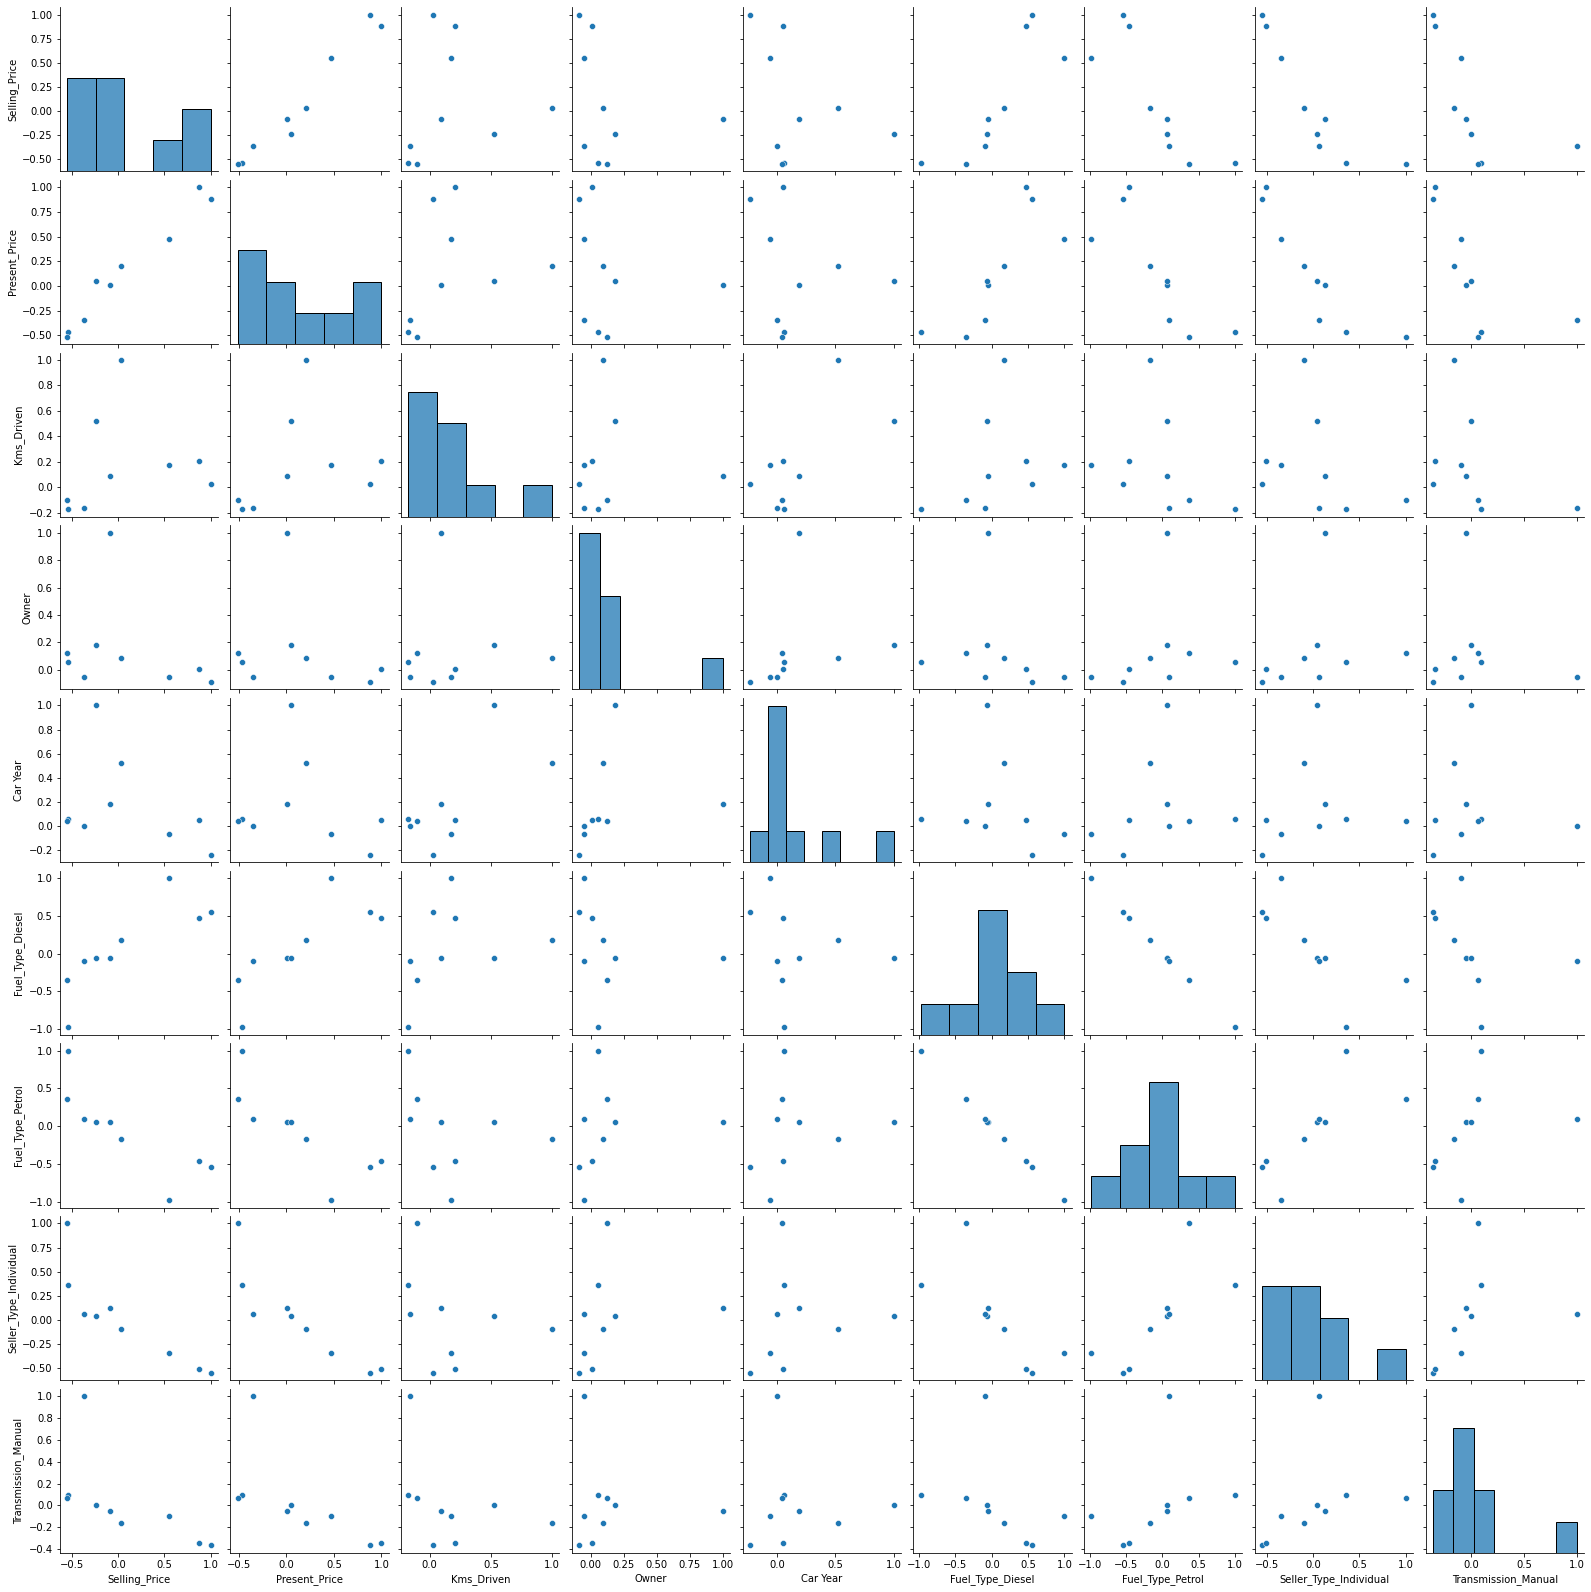

In [ ]:
sea.pairplot(finaldf.corr())

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

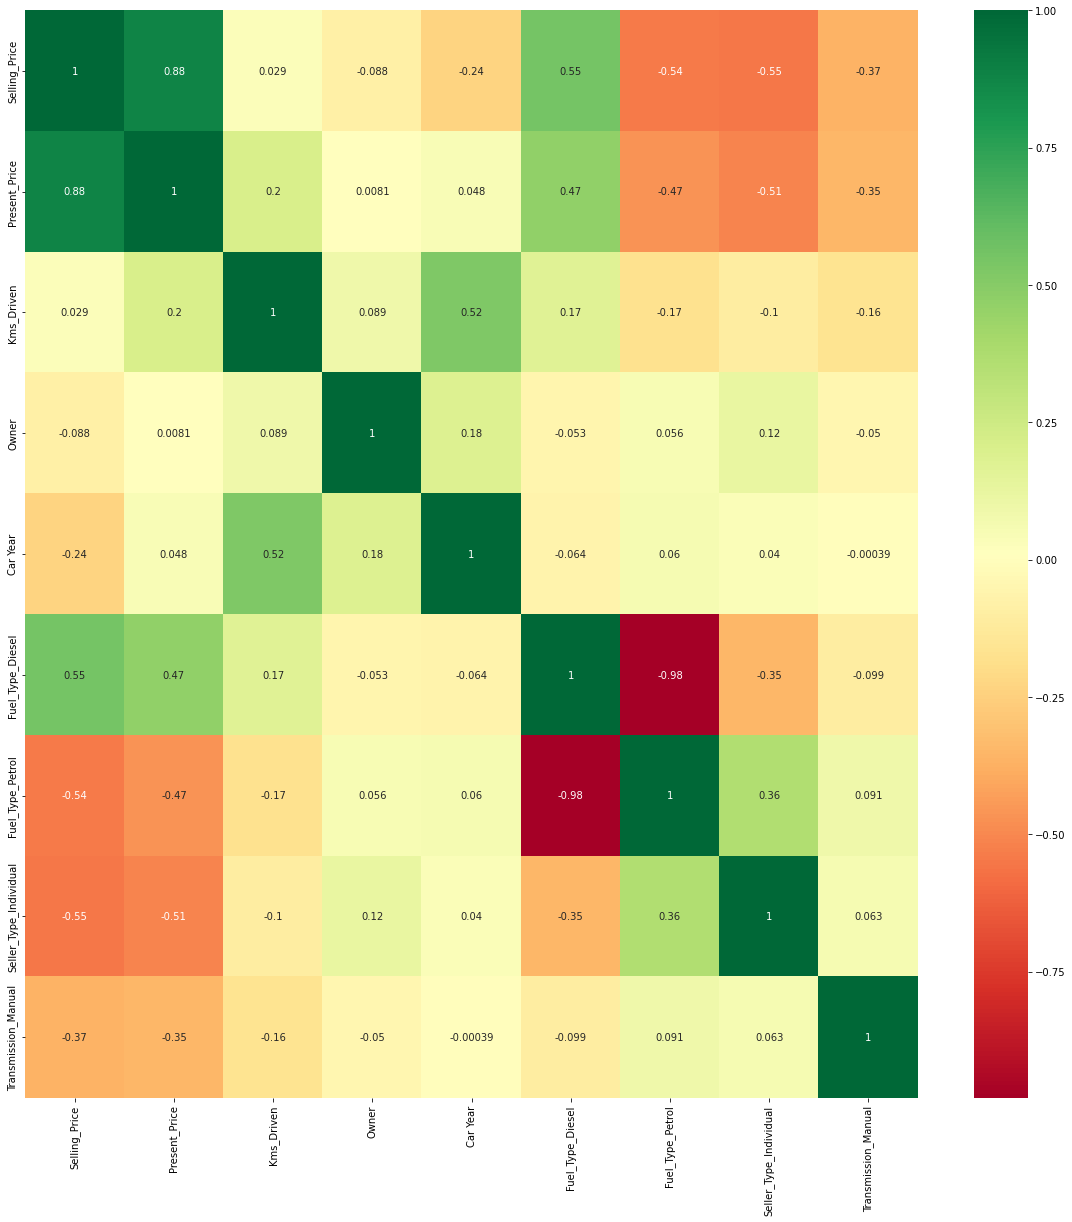

In [ ]:
heatmap = finaldf.corr()
#correlations of each features 
topcorrfeatures = heatmap.index
plt.figure(figsize=(20,20))
map=sea.heatmap(finaldf[topcorrfeatures].corr(),annot=True,cmap="RdYlGn") 

In [ ]:
finaldf.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [ ]:
X=finaldf.iloc[:,1:] 
y=finaldf.iloc[:,0] 

In [ ]:
X.head()

,Present_Price,Kms_Driven,Owner,Car Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [ ]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor #important features
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[3.77820503e-01 3.88430040e-02 3.31044660e-04 7.65213042e-02
 2.32932132e-01 1.36646324e-02 1.26547083e-01 1.33340297e-01]


In [ ]:
X.head() 

,Present_Price,Kms_Driven,Owner,Car Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


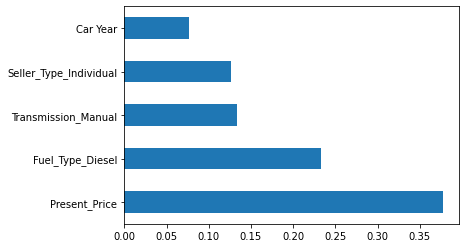

In [ ]:
importancegraph = pd.Series(model.feature_importances_, index=X.columns)
importancegraph.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #30% test size

In [ ]:
X_train

,Present_Price,Kms_Driven,Owner,Car Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
222,7.60,77632,0,8,1,0,0,1
283,11.80,9010,0,6,0,1,0,1
44,2.69,50000,0,10,0,1,0,1
245,9.40,71000,0,10,1,0,0,1
191,0.57,25000,1,10,0,1,1,1
...,...,...,...,...,...,...,...,...
251,9.90,56701,0,9,0,1,0,1
192,0.75,49000,1,15,0,1,1,1
117,1.90,14000,0,7,0,1,1,1
47,4.15,65000,0,16,0,1,0,1


In [ ]:
X_test.head()

,Present_Price,Kms_Driven,Owner,Car Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
223,9.400,61381,0,7,1,0,0,1
150,0.826,6000,0,11,0,1,1,1
226,5.700,24678,0,7,0,1,0,1
296,11.600,33988,0,6,1,0,0,1
52,19.770,15000,0,5,1,0,0,0


In [ ]:
X_train.shape

(210, 8)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
               'max_features': ["auto", "sqrt"],
               'max_depth': [int(x) for x in np.linspace(5, 30, num = 6)],
               'min_samples_split': [2, 5, 10, 15, 100],
               'min_samples_leaf': [1, 2, 5, 10]}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rfg = RandomForestRegressor()
rfg_random = RandomizedSearchCV(estimator = rfg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rfg_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rfg_random.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
predictions=rfg_random.predict(X_test)
predictions

array([ 7.09155   ,  0.54145   ,  5.01189   ,  9.22933   , 16.48939   ,
        4.97846   ,  3.41596   ,  0.74765   ,  4.6082    ,  4.5292    ,
        3.10675   ,  0.86365   ,  5.0071    ,  7.83936   ,  7.93722   ,
       10.61482   ,  7.31067   ,  4.09881667,  0.48004   ,  1.49335   ,
        3.88437   ,  4.68017   ,  5.4687    ,  9.58393   ,  0.26897   ,
        0.76114   ,  0.47914   ,  0.64738   ,  0.48328   ,  4.90455   ,
        5.16503   ,  5.8703    ,  0.50544   ,  8.83357   ,  3.4902    ,
        1.18762   ,  5.68258   ,  7.44801   ,  0.23648   ,  9.18213   ,
        9.30472   , 19.53025   ,  4.88604   ,  4.14415   ,  5.46005   ,
       11.80261   ,  0.3082    ,  0.89278   ,  5.00385   ,  8.32763   ,
        7.54232   ,  3.4934    ,  4.7328    , 20.38786   ,  1.10779   ,
        1.03578   ,  0.48768   ,  2.7625    ,  3.61795   ,  1.29108   ,
        3.88926   ,  9.13613   ,  3.1738    , 20.84407   ,  4.20605   ,
        5.57123   , 10.21761   ,  4.8011    ,  0.52125   ,  2.97

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


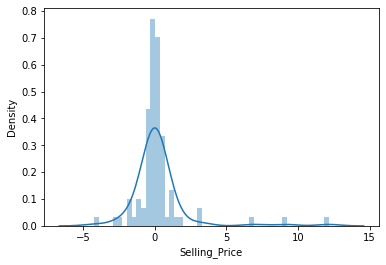

In [ ]:
sea.distplot(y_test-predictions)

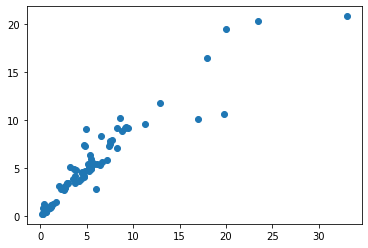

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics
print('MEAN SQUARED ERROR:', metrics.mean_squared_error(y_test, predictions))
print('MEAN ABSOLUTE ERROR:', metrics.mean_absolute_error(y_test, predictions))
print('ROOT MEAN SQUARED ERROR:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MEAN SQUARED ERROR: 4.005548716638584
MEAN ABSOLUTE ERROR: 0.8885924542124524
ROOT MEAN SQUARED ERROR: 2.0013866984265145


In [ ]:
rfg_random.best_score_

-4.015506542399695